In [2]:
import sys
sys.path = ['D:\Coding\py\py3\experiments\easyEEG_dist\\']+sys.path 
import easyEEG
# epochs = easyEEG.io.load_epochs('d:/test.h5')
epochs = easyEEG.io.load_epochs('D:/Coding/py/IPython Notebooks/experiment/chunking/data/epoches_0124.h5',compress=True)
epochs.info['conditions']['format'] = '(global)(local)(target)'
''''''
# subjIDs = set(range(24,45))-set([41])-set([28,29,31,34])
# epochs = easyEEG.io.load_epochs([f'{sub}.pickle' for sub in subjIDs],path='D:/Coding/py/IPython Notebooks/experiment/chunking/data/epoches_0418')
# epochs.info['conditions']['format'] = '(global)(local)(target)'
''''''
# subjIDs = [25,26]
# files = [f'd:\\lab\\eeg\\rawdata\\sub{subjID}\\sub{subjID}.vhdr' for subjID in subjIDs]
# markers = {'FfG': 1, 'FfL': 2, 'FfR': 3, 'FtG': 4, 'FtL': 5, 'FtR': 6, 'TfG': 7, 'TfL': 8, 'TfR': 9, 'TtG': 10, 'TtL': 11, 'TtR': 12, 'baseG': 13, 'baseL': 14, 'baseR': 15}
# epochs = easyEEG.io.load_raw_eeg(files=files,subjIDs=[],events_dict=markers,default_reference_channels='Cz',filter_range=(0.1, 30.),ref_channels='average',epoch_range=(-0.2, 1))
''''''
# epochs.save('D:/Coding/py/IPython Notebooks/experiment/chunking/data/epoches_0418.h5')

C:\app\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


EasyEEG loaded.
reading 24
reading 25
reading 26
reading 27
reading 30
reading 32
reading 33
reading 35
reading 36
reading 37
reading 38
reading 39
reading 40
reading 42
reading 43
reading 44
Concatenated.


''

100% 35/35 [00:00<00:00, 197.21it/s]


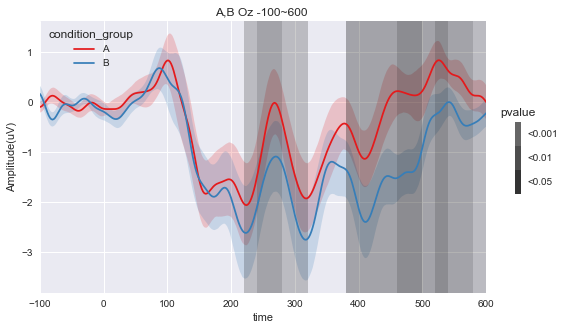

In [50]:
easyEEG.reload(easyEEG.algorithms.erp)

script = {'conditions': 'TtG,TfG',
        'channels': 'Cz',
        'timepoints': '-100~600'}
data = epochs.extract({'conditions': 'A:TtG,B:TfG', 'channels': 'Oz', 'timepoints': '-100~600'}).ERP(compare=True)
data.plot()

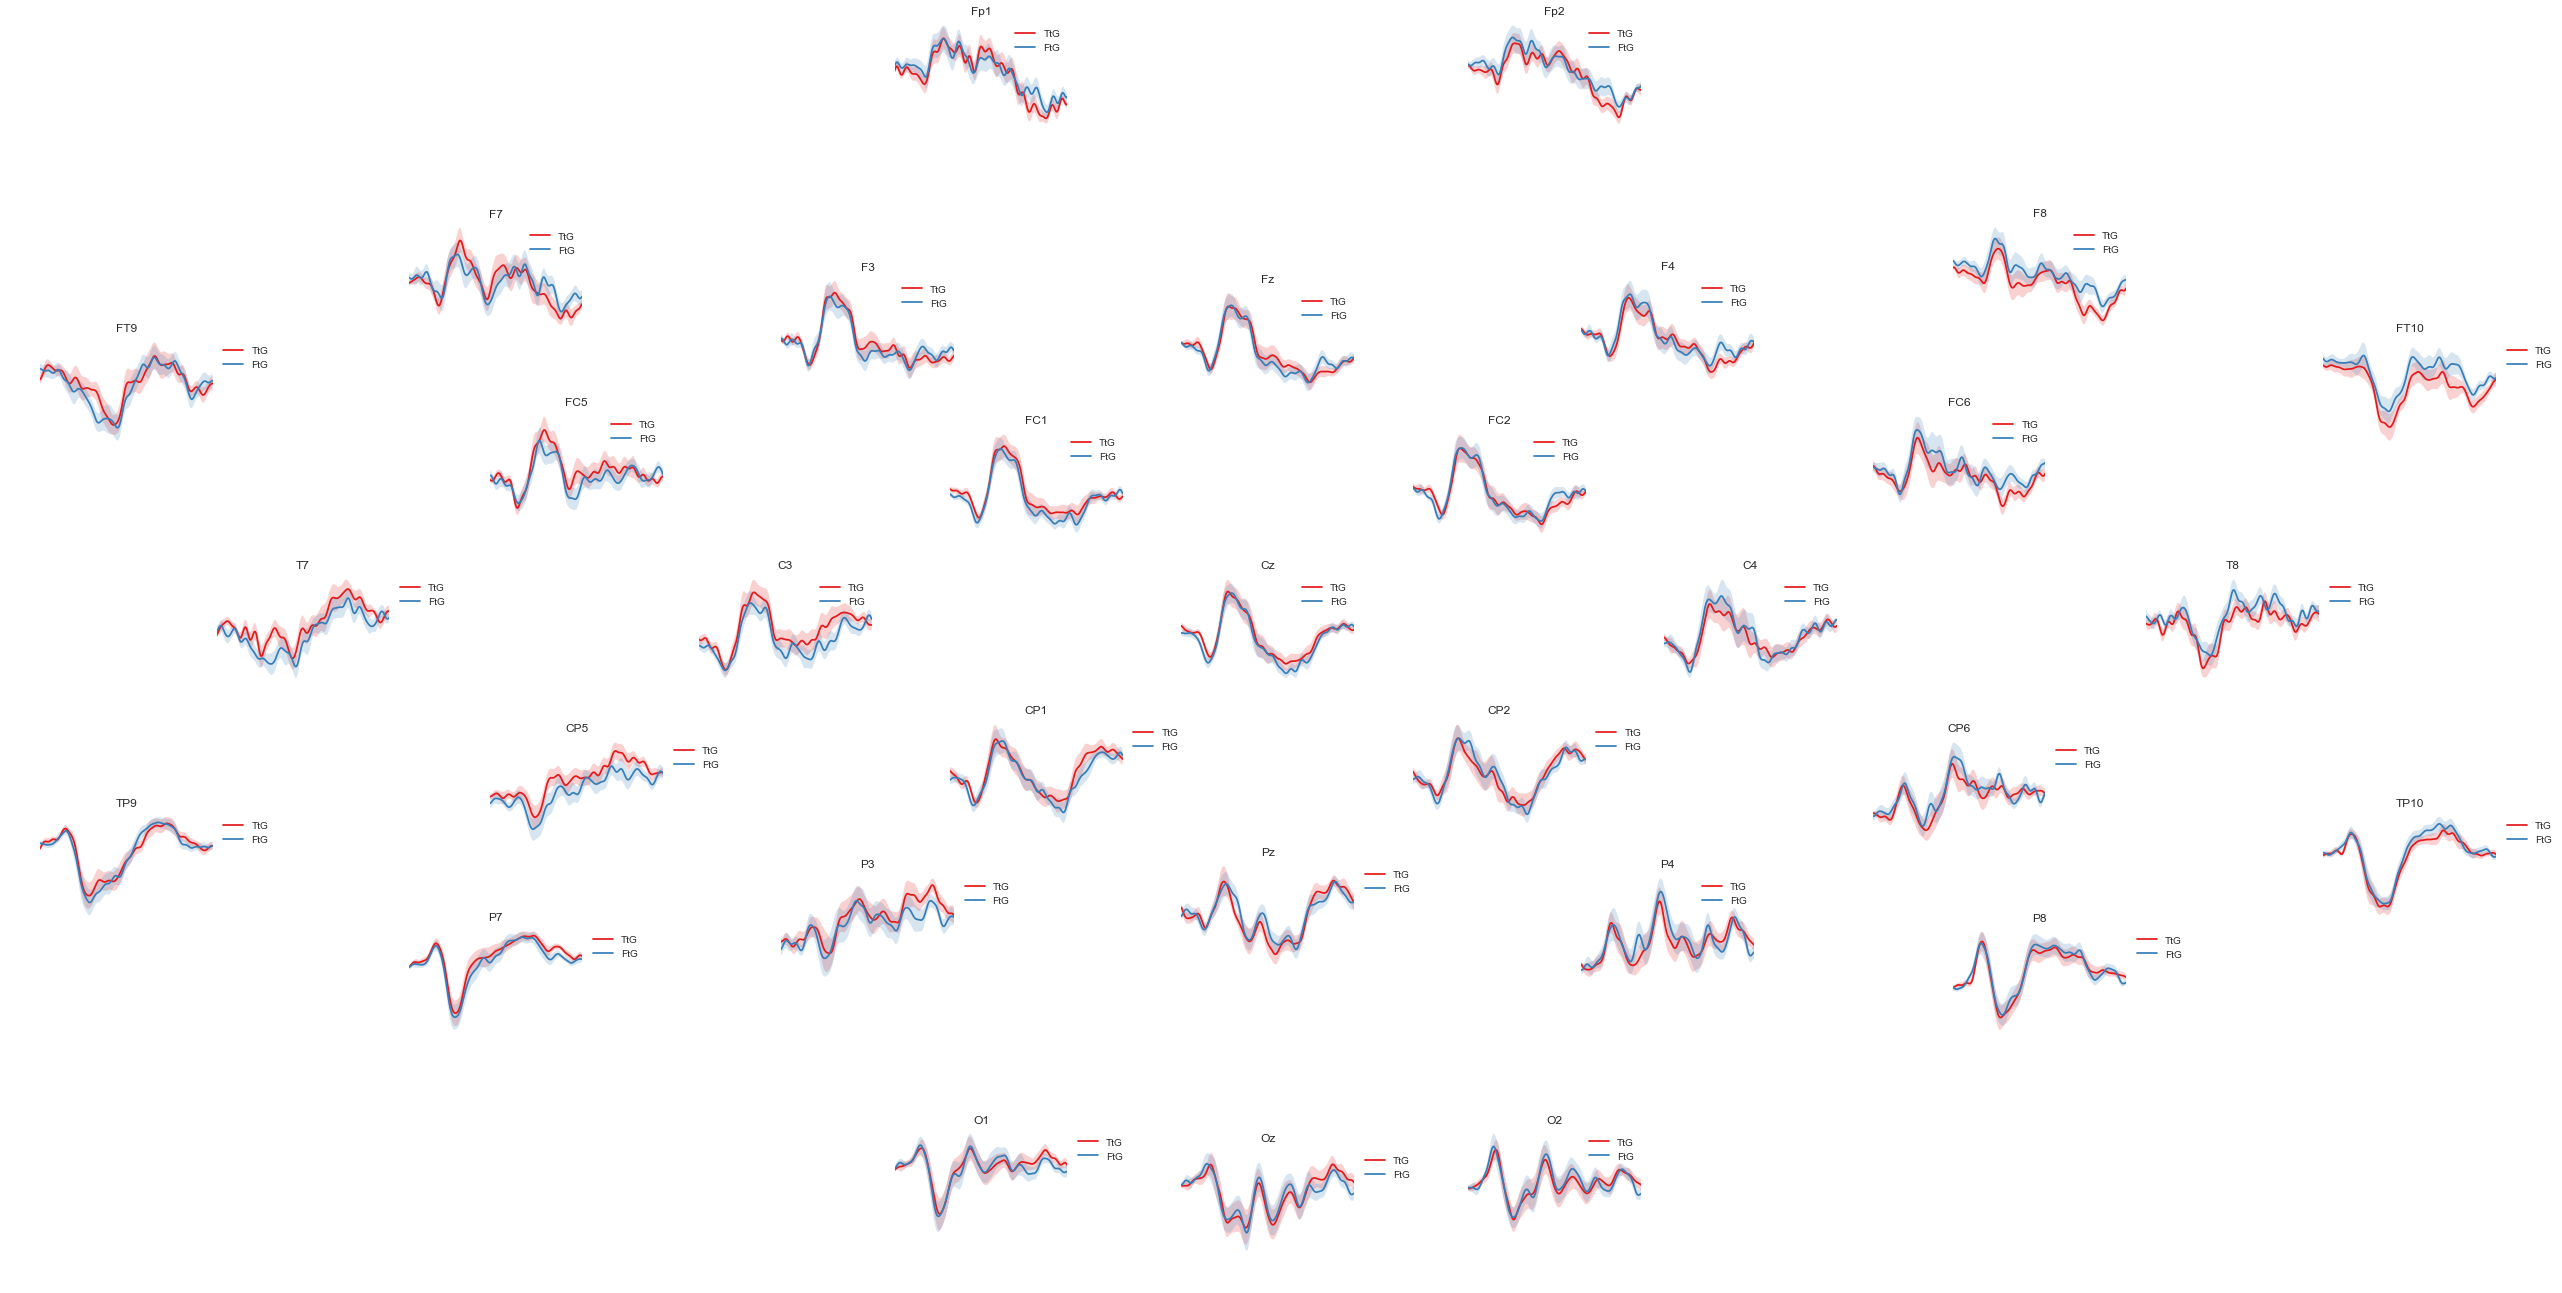

In [7]:
# easyEEG.reload(easyEEG.algorithms.erp)
script = {'conditions': 'TtG,FtG', 'channels': 'each', 'timepoints': '0~600'}
epochs.extract(script).topo_ERPs().plot()

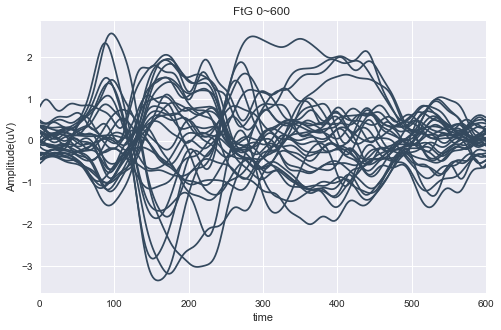

In [51]:
# easyEEG.reload(easyEEG.algorithms.erp)
script = 'FtG @ each @ 0~600'
epochs.extract(script).ERPs().plot()

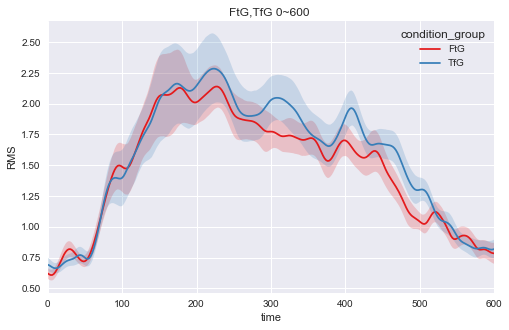

In [52]:
# easyEEG.reload(easyEEG.algorithms.erp)
script = {'conditions': 'FtG,TfG', 'timepoints': '0~600'}
epochs.extract(script).RMS().plot()

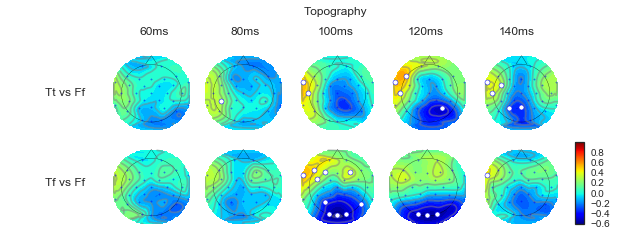

In [8]:
# easyEEG.reload(easyEEG.algorithms.topo)
    
script = [{'conditions': 'Tt vs Ff:TtG+TtL+TtR&FfG+FfL+FfR,Tf vs Ff:{global=T&local=f}&{global=F&local=f}',
                      'channel':'each',
                      'timepoints': '50~150'}]
epochs.extract(script).topography(win_size='20ms').plot()

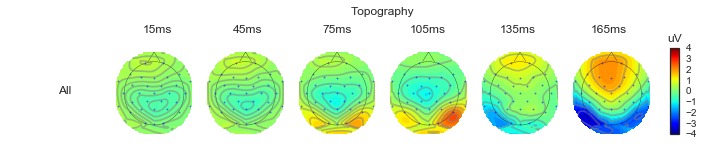

In [79]:
easyEEG.reload(easyEEG.algorithms.topo)
script = [{'channel':'each','timepoints': '0~180'}]
epochs.extract(script).topography(win_size='30ms').plot(plot_params=dict(zlim=(-4,4)))

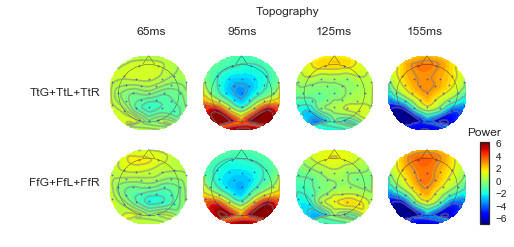

In [49]:
easyEEG.reload(easyEEG.algorithms.topo)
script = [{'conditions': 'TtG+TtL+TtR,FfG+FfL+FfR',
                      'channel':'each',
                      'timepoints': '50~150'}]
epochs.extract(script).frequency_topography(win_size='30ms',target=10).plot()

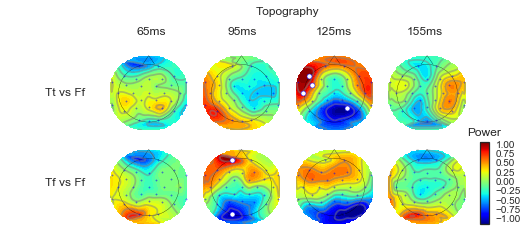

In [48]:
easyEEG.reload(easyEEG.algorithms.topo)
script = [{'conditions': 'Tt vs Ff:TtG+TtL+TtR&FfG+FfL+FfR,Tf vs Ff:{global=T&local=f}&{global=F&local=f}',
                      'channel':'each',
                      'timepoints': '50~150'}]
epochs.extract(script).frequency_topography(win_size='30ms',target=[8,12]).plot()

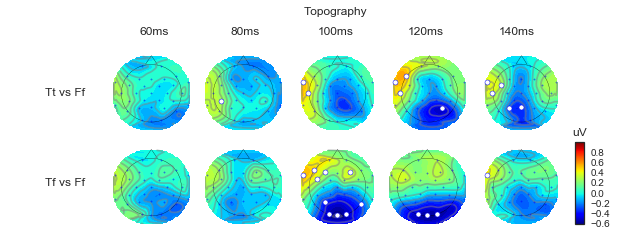

In [65]:
easyEEG.reload(easyEEG.algorithms.topo)
script = {'conditions': 'Tt vs Ff:TtG+TtL+TtR&FfG+FfL+FfR,Tf vs Ff:{global=T&local=f}&{global=F&local=f}',
                      'channel':'all',
                      'timepoints': '50~150'}
epochs.extract(script).topography(win_size='20ms').plot()

100% 35/35 [00:00<00:00, 200.61it/s]


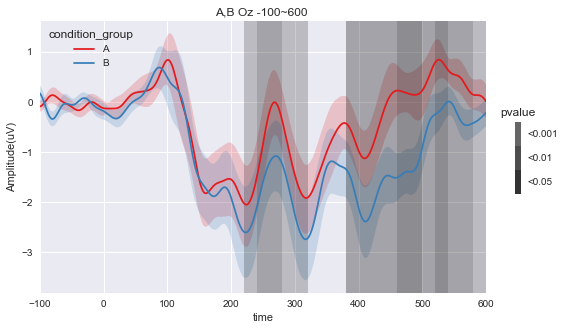

In [78]:
easyEEG.reload(easyEEG.algorithms.erp)
script = {'conditions': 'TtG,TfG',
'channels': 'Cz',
'timepoints': '-100~600'}
data = epochs.extract({'conditions': 'A:TtG,B:TfG', 'channels': 'Oz', 'timepoints': '-100~600'}).ERP(compare=True)
data.plot()

100% 401/401 [00:02<00:00, 195.30it/s]
100% 401/401 [00:01<00:00, 204.96it/s]
100% 401/401 [00:01<00:00, 207.33it/s]
100% 401/401 [00:01<00:00, 215.41it/s]
100% 401/401 [00:01<00:00, 211.66it/s]


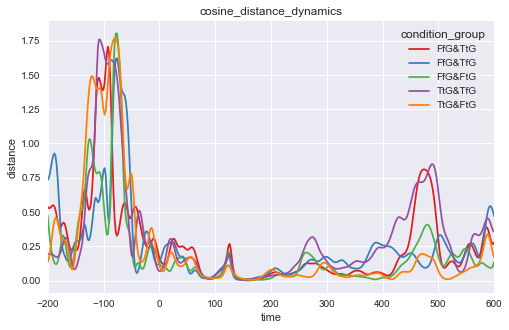

In [84]:
easyEEG.reload(easyEEG.algorithms.cosine_distance_models)
script = [{'conditions': 'FfG&TtG,FfG&TfG,FfG&FtG,TtG&TfG,TtG&FtG',
                      'timepoints': '-200~600'}]
e = epochs.extract(script)
t = e.cosine_distance_dynamics()
t.plot()

In [ ]:
# script = [{'conditions': 
#                       'T vs F:{global=T}&{global=F},\
#                       T□G vs F□G:{global=T&target=G}&{global=F&target=G},\
#                       T□L vs F□L:{global=T&target!=G}&{global=F&target!=G},\
#                       t vs f:{local=t}&{local=f},\
#                       □tG vs □fG:{local=t&target=G}&{local=f&target!=G},\
#                       □fL vs □fL:{local=t&target!=G}&{local=f&target!=G}',
#                       'timepoints': '0~800'}]
script = [{'conditions': 'T vs F:{global=T}&{global=F}',
                      'timepoints': '50~80'}]
e = epochs.extract(script)

t1 = e.tanova(win_size='10ms',shuffle=10,mode=1)

# easyEEG.reload(easyEEG.algorithms.classification_models)
# epochs.extract(script).classification(win_size='5ms',fold=10).plot()

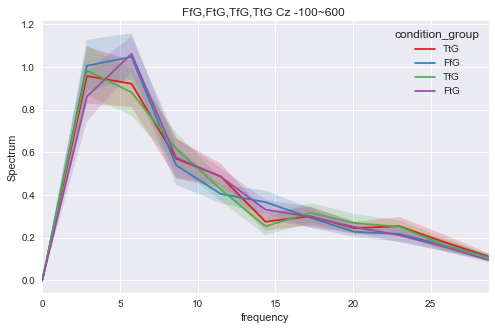

In [85]:
# easyEEG.reload(easyEEG.algorithms.spectrum)
script = ['TtG,FfG,TfG,FtG @ Cz @ -100~600']
epochs.extract(script).Spectrum().plot()

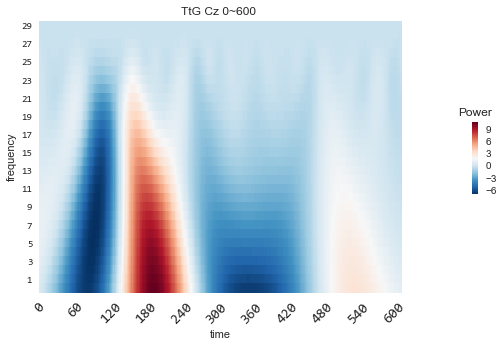

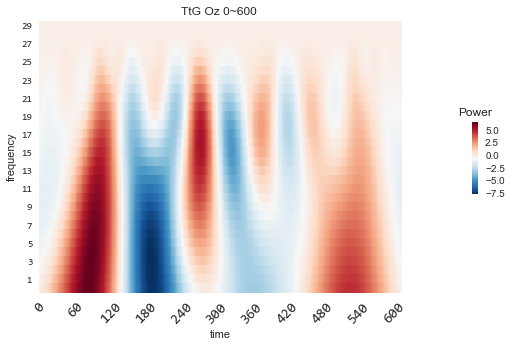

In [11]:
# easyEEG.reload(easyEEG.algorithms.spectrum)
script = ['TtG @ Cz @ 0~600', 'TtG @ Oz @ 0~600']
epochs.extract(script).Time_frequency().plot()

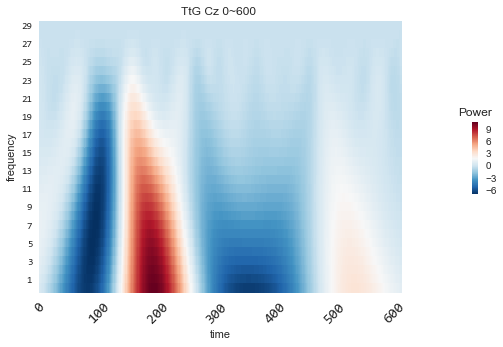

In [175]:
easyEEG.reload(easyEEG.algorithms.spectrum)
script = 'TtG @ Cz @ 0~600'
epochs.extract(script).Time_frequency().plot()

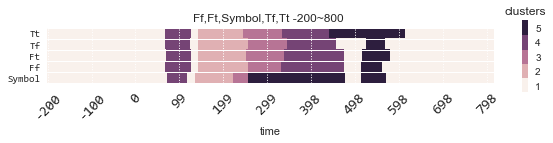

In [12]:
# easyEEG.reload(easyEEG.algorithms.cluster_models)
script = {'conditions': 'Tt:TtG+TtL+TtR,Tf:TfG+TfL+TfR,Ft:FtG+FtL+FtR,Ff:FfG+FfL+FfR,Symbol:baseG+baseL+baseR',
                      'channel':'each',
                      'timepoints': '-200~800'}
epochs.extract(script).clustering(n_clusters=5).plot()

100% 1280/1280 [00:06<00:00, 201.10it/s]
100% 1280/1280 [00:06<00:00, 203.38it/s]


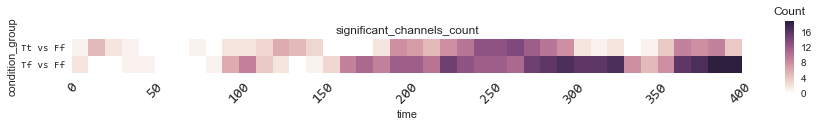

In [106]:
easyEEG.reload(easyEEG.algorithms.topo)
script = [{'conditions': 'Tt vs Ff:TtG+TtL+TtR&FfG+FfL+FfR,Tf vs Ff:TfG+TfL+TfR&FfG+FfL+FfR',
                      'channel':'each',
                      'timepoints': '0~400'}]

epochs.extract(script).significant_channels_count(win_size='10ms').plot()

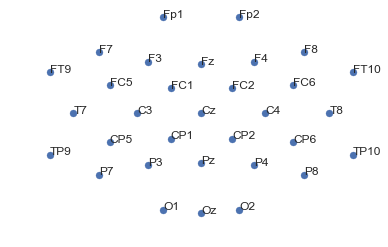

In [14]:
easyEEG.graph.figure_unit.channel_locs(epochs.info['xy_locs'])